In [1]:
import src.turing_causal_impact.queries_sales as queries_sales
import causal_inference

import importlib
import pandas as pd
import seaborn as sns
import os
import datetime as dt
import numpy as np
import json

In [6]:
scenarios_files = ['/scenarios/us-multaq3.json', '/scenarios/us-multaq3-1.json']

In [9]:

scenarios = []
# with open("scenarios/us_multaq.json") as f:
#     scenarios.append(json.loads(f.read()))
# with open("scenarios/us_multaq_2.json") as f:
#     scenarios.append(json.loads(f.read()))
for s_file in scenarios_files:
    with open(s_file) as f:
        scenarios.append(json.loads(f.read()))

In [10]:
scenarios

[{'name': 'us-multaq3',
  'country': 'US',
  'brands': ['MULTAQ', 'SOTALOL'],
  'target_brand': 'MULTAQ',
  'metric': 'SUM(QUANTITY_SOLD)',
  'cutover': '2023-09-01',
  'min_date': '2023-01-01',
  'frequency': 'weekly'},
 {'name': 'us-multaq3',
  'country': 'US',
  'brands': ['MULTAQ', 'SOTALOL'],
  'target_brand': 'MULTAQ',
  'metric': 'SUM(QUANTITY_SOLD)',
  'cutover': '2023-09-01',
  'min_date': '2023-01-01',
  'frequency': 'weekly'}]

# Get data

In [ ]:
queries_sales = importlib.reload(queries_sales)

In [ ]:
# queries_sales.get_all_sales_data([{'country':'BRAZIL', 'brands':['%PURAN%']}, {'country':'US', 'brands':['%PURAN%']}], '2024-01-01')
queries_sales.get_all_sales_data(scenarios, '2024-01-01')

# Causal impact


## installation if need be

In [4]:
causal_inference = importlib.reload(causal_inference)

Scenario: us-multaq3
###############################



['2023-01-06', '2023-09-01'] ['2023-09-08', '2024-02-02']



/Users/I0517417/Documents/analyses/causal-impact/.env/lib/python3.11/site-packages/causalimpact/data.py:263: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not data.applymap(np.isreal).values.all():
/Users/I0517417/Documents/analyses/causal-impact/.env/lib/python3.11/site-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.


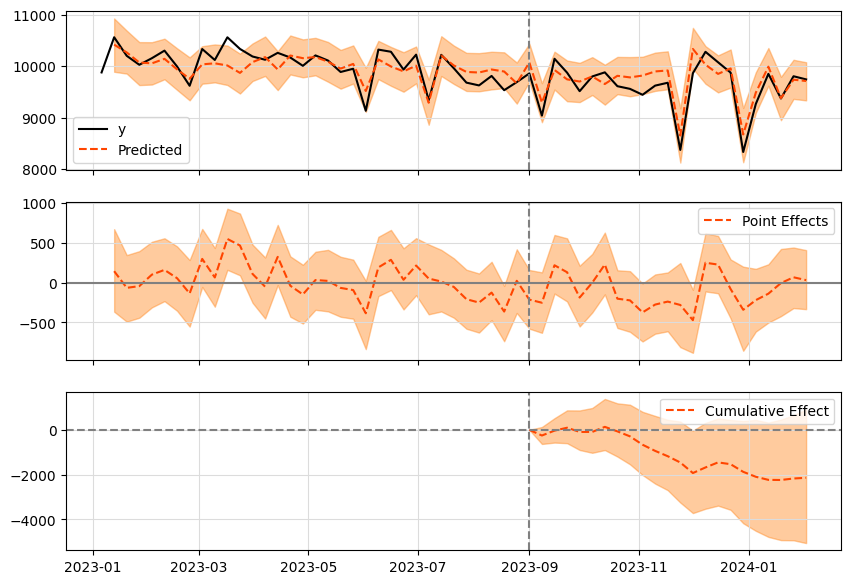

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    9590.77            210997.0
Prediction (s.d.)         9688.17 (69.71)    213139.67 (1533.73)
95% CI                    [9550.02, 9823.29] [210100.36, 216112.48]

Absolute effect (s.d.)    -97.39 (69.71)     -2142.67 (1533.73)
95% CI                    [-232.52, 40.76]   [-5115.48, 896.64]

Relative effect (s.d.)    -1.01% (0.72%)     -1.01% (0.72%)
95% CI                    [-2.4%, 0.42%]     [-2.4%, 0.42%]

Posterior tail-area probability p: 0.08
Posterior prob. of a causal effect: 91.91%

For more details run the command: print(impact.summary('report'))


In [5]:
for scenario in scenarios:
    print(f"Scenario: {scenario['name']}")
    print("###############################")
    print()

    #load data
    df = pd.read_parquet(f"data/{scenario['name']}.parquet")
    # {'fit_method': 'hmc'}
    impact = causal_inference.provide_analyse(scenario, df, model_args={'fit_method': 'hmc'})
    
    impact.plot()
    print(impact.summary())

In [ ]:
print(impact.summary('report'))